# Análise de Precipitação Pluviométrica – 2025

### Carregando dados

In [56]:
import pandas as pd
import calendar
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale

df = pd.read_csv("dados-precipitacao.csv", delimiter=",", decimal=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prefixo    342 non-null    object 
 1   Nome       342 non-null    object 
 2   TipoPosto  342 non-null    int64  
 3   Data       342 non-null    object 
 4   Valor      342 non-null    object 
 5   Valor2     0 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 16.2+ KB


In [57]:
df.head()


,Prefixo,Nome,TipoPosto,Data,Valor,Valor2
0,351870108A,Guarujá (Jardim da Esperança),2,2026/01/01,0,NaN
1,351870108A,Guarujá (Jardim da Esperança),2,2025/12/31,1.5743800000000001,NaN
2,351870108A,Guarujá (Jardim da Esperança),2,2025/12/30,9.266684235298676,NaN
3,351870108A,Guarujá (Jardim da Esperança),2,2025/12/29,0,NaN
4,351870108A,Guarujá (Jardim da Esperança),2,2025/12/28,0,NaN


### Transformando dados

In [58]:
# Removendo colunas e a primeira linha
df = df.iloc[1:].drop(columns=['Prefixo', 'Nome', 'TipoPosto', 'Valor2'])

# Transformando colunas para date e float
df['Data'] = pd.to_datetime(df['Data'])
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 1 to 341
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    341 non-null    datetime64[ns]
 1   Valor   341 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.5 KB


In [59]:
df.head()

,Data,Valor
1,2025-12-31,1.574380
2,2025-12-30,9.266684
3,2025-12-29,0.000000
4,2025-12-28,0.000000
5,2025-12-27,0.000000


### Análise

In [60]:
# Procurar valores duplicados
print(f'O número de valores duplicados: {df.duplicated().sum()}')



# Verificando se tem linhas vazias
print(f"O número de linhas vazias: {df.apply(lambda x: x.astype(str).str.strip() == '').sum().sum()}")



dias_registrados = df['Data'].dt.date.nunique()
total_dias_ano = 365
dias_faltantes = total_dias_ano - dias_registrados

print(f'Dias sem registro: {dias_faltantes}')



# Dias registrados
dias_contados = df['Data'].dt.date.nunique()

print(f'Dias registrados: {dias_contados}')



# dias sem chuva
print(f'Dias sem chuva: {df.Valor[df.Valor == 0].count()}')



# Chuva acumulado no ano
chuva_acumulada = df['Valor'].sum().round(2)

print(f'Chuva acumulada no ano de 2025: {chuva_acumulada}mm')



# Precipitação diária média levando em conta todos os dias registrados
media_chuva_por_dia = chuva_acumulada.mean()

print(f'Precipitação média em relação ao total do ano: {(media_chuva_por_dia / dias_contados).round(2)}mm')



# Precipitação diária média levando em conta todos os dias que choveram
df_somente_chuva = df[df['Valor'] > 0]
dias_com_chuva_real = df_somente_chuva.groupby(df_somente_chuva['Data'].dt.date)['Valor'].sum()
media_dias_chuvosos = dias_com_chuva_real.mean()

print(f'Em 2025, choveu em média {media_dias_chuvosos:.2f} mm³ nos dias em que houve precipitação.')
print(f'Total de dias com chuva registrados: {len(dias_com_chuva_real)}')

O número de valores duplicados: 0
O número de linhas vazias: 0
Dias sem registro: 24
Dias registrados: 341
Dias sem chuva: 194
Chuva acumulada no ano de 2025: 1998.23mm
Precipitação média em relação ao total do ano: 5.86mm
Em 2025, choveu em média 13.59 mm³ nos dias em que houve precipitação.
Total de dias com chuva registrados: 147


In [61]:
# dias com mais chuvas
top_10_mais_chuva = df.nlargest(10, 'Valor').round(2)
print(f'-----Top 10 dias com mais chuva em 2025-----')
for index, linha in top_10_mais_chuva.iterrows():
    data_formatada = linha['Data'].strftime('%d/%m/%Y')
    print(f'{data_formatada}: {linha['Valor']}mm')



# dia com menos chuva
top_10_menos_chuva = df[df['Valor'] > 0].nsmallest(10, 'Valor').round(2)
print(f'-----Top 10 dias com menos chuva em 2025-----')
for index, linha in top_10_menos_chuva.iterrows():
    data_formatada = linha['Data'].strftime('%d/%m/%Y')
    print(f"{data_formatada}: {linha['Valor']}mm")




-----Top 10 dias com mais chuva em 2025-----
06/08/2025: 179.14mm
20/04/2025: 155.09mm
19/02/2025: 98.8mm
29/01/2025: 97.49mm
24/11/2025: 84.44mm
30/01/2025: 80.01mm
26/01/2025: 65.93mm
18/02/2025: 47.15mm
03/01/2025: 45.56mm
01/02/2025: 42.09mm
-----Top 10 dias com menos chuva em 2025-----
20/12/2025: 0.2mm
19/12/2025: 0.2mm
23/10/2025: 0.2mm
21/10/2025: 0.2mm
21/09/2025: 0.2mm
31/08/2025: 0.2mm
15/08/2025: 0.2mm
08/08/2025: 0.2mm
25/07/2025: 0.2mm
05/07/2025: 0.2mm


In [62]:
# chuva por semana
print(f'Quantidade de chuva em cada de semana do ano em mm')
chuva_semanal = df.set_index('Data')['Valor'].resample('W').sum().round(2)
renomear_semanas = [f"{i+1}ª Semana" for i in range(len(chuva_semanal))]
chuva_semanal.index = renomear_semanas
print(chuva_semanal)

Quantidade de chuva em cada de semana do ano em mm
1ª Semana      64.99
2ª Semana      27.18
3ª Semana      22.15
4ª Semana      67.91
5ª Semana     258.19
6ª Semana      66.50
7ª Semana       5.72
8ª Semana     148.32
9ª Semana       1.18
10ª Semana      0.00
11ª Semana      0.00
12ª Semana      1.59
13ª Semana      1.78
14ª Semana     50.49
15ª Semana     24.42
16ª Semana    192.47
17ª Semana     46.13
18ª Semana      5.53
19ª Semana     36.48
20ª Semana      9.28
21ª Semana     25.09
22ª Semana      0.40
23ª Semana     17.73
24ª Semana     64.63
25ª Semana      9.46
26ª Semana     27.84
27ª Semana     67.73
28ª Semana      3.36
29ª Semana      0.00
30ª Semana      1.00
31ª Semana      0.60
32ª Semana    189.82
33ª Semana      3.03
34ª Semana      1.20
35ª Semana     39.73
36ª Semana     22.84
37ª Semana      0.79
38ª Semana      7.50
39ª Semana     52.84
40ª Semana      0.00
41ª Semana     65.64
42ª Semana     52.02
43ª Semana      1.98
44ª Semana     41.50
45ª Semana     28.42
46ª 

In [63]:
# precipitação mensal
print(f'Acumulado de chuva ao mês em mm')
total_mes = df.groupby(df['Data'].dt.month)['Valor'].sum().round(2)
total_mes.index = total_mes.index.map(lambda x: calendar.month_name[x])

print(total_mes)

Acumulado de chuva ao mês em mm
Data
January      380.21
February     281.93
March          3.37
April        319.03
May           71.25
June         126.84
July          65.52
August       233.78
September     83.97
October      144.77
November     174.68
December     112.87
Name: Valor, dtype: float64


In [64]:
# precipitação media mensal
chuva_por_mes = df.groupby(df['Data'].dt.month)['Valor'].sum()
media_mensal = chuva_por_mes.mean()

print(f"A média mensal de precipitação é: {media_mensal:.2f}")

A média mensal de precipitação é: 166.52


In [65]:
# chuva no verao
inicio_verao = '01-01-2025'
fim_verao = '20-03-2025'
verao = df[(df['Data'] >= inicio_verao) & (df['Data'] <= fim_verao)]
soma_verao = verao['Valor'].sum()
media_verao = verao['Valor'].mean()

print(f"Soma do verao: {soma_verao:.2f}mm")
print(f"Média do verao: {media_verao:.2f}mm")



# chuva no outono
inicio_outono = '20-03-2025'
fim_outono = '20-06-2025'
outono = df[(df['Data'] >= inicio_outono) & (df['Data'] <= fim_outono)]
soma_outono = outono['Valor'].sum()
media_outono = outono['Valor'].mean()

print(f"Soma do outono: {soma_outono:.2f}mm")
print(f"Média do outono: {media_outono:.2f}mm")



# chuva no inverno
inicio_inverno = '20-06-2025'
fim_inverno = '22-09-2025'
inverno = df[(df['Data'] >= inicio_inverno) & (df['Data'] <= fim_inverno)]
soma_inverno = inverno['Valor'].sum()
media_inverno = inverno['Valor'].mean()

print(f"Soma do inverno: {soma_inverno:.2f}mm")
print(f"Média do inverno: {media_inverno:.2f}mm")



# chuva na primavera
inicio_primavera = '22-09-2025'
fim_primavera = '31-12-2025'
primavera = df[(df['Data'] >= inicio_primavera) & (df['Data'] <= fim_primavera)]
soma_primavera = primavera['Valor'].sum()
media_primavera = primavera['Valor'].mean()

print(f"Soma do primavera: {soma_primavera:.2f}mm")
print(f"Média do primavera: {media_primavera:.2f}mm")

Soma do verao: 663.13mm
Média do verao: 9.34mm
Soma do outono: 475.03mm
Média do outono: 5.72mm
Soma do inverno: 412.53mm
Média do inverno: 4.34mm
Soma do primavera: 485.16mm
Média do primavera: 5.16mm


### Gráficos

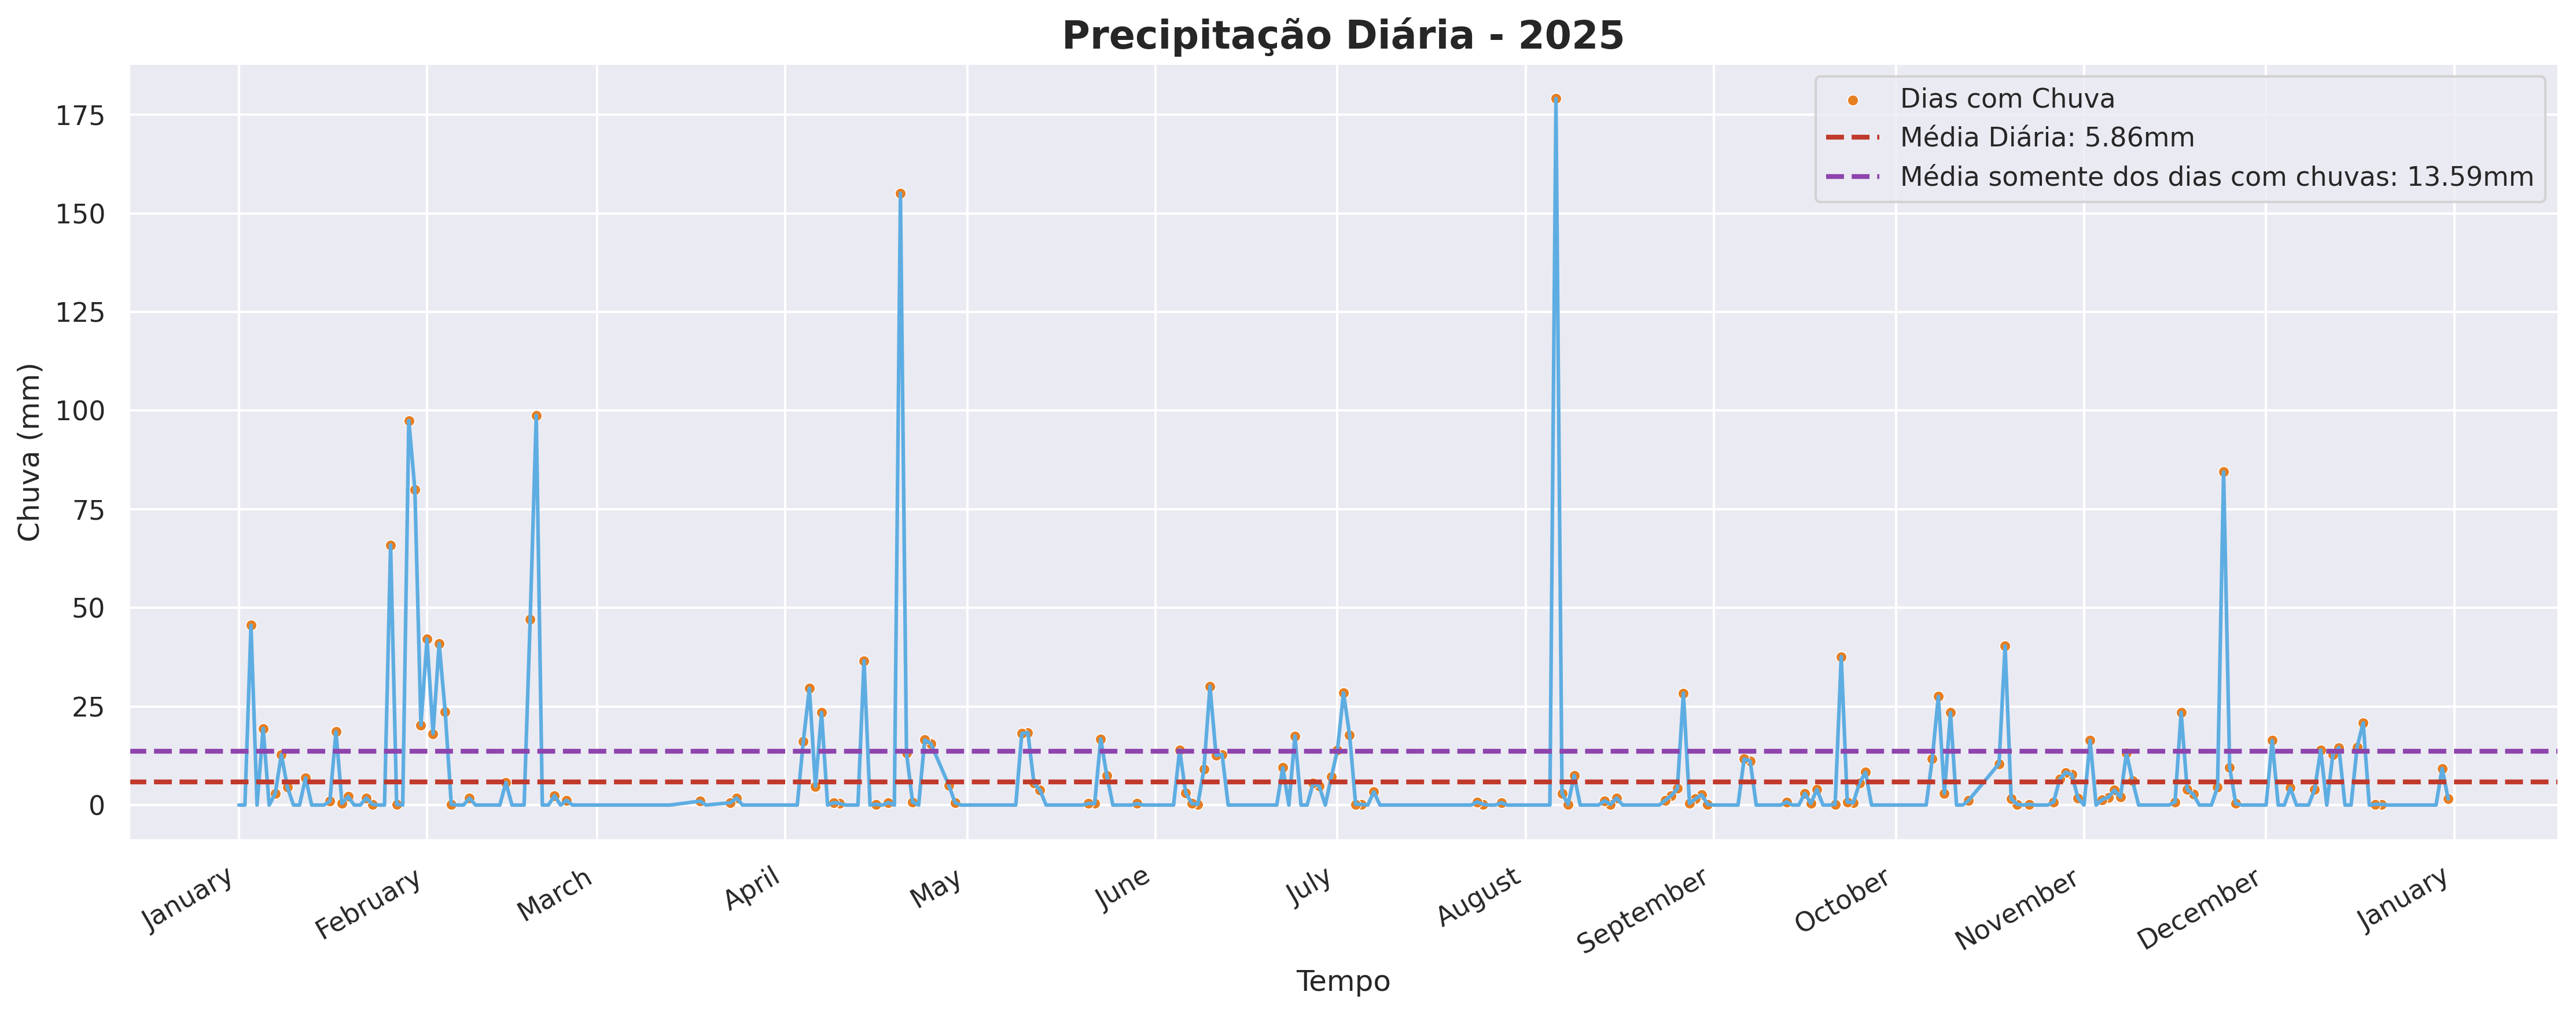

In [70]:
df_somente_chuva = df[df['Valor'] > 0]
dias_com_chuva_real = df_somente_chuva.groupby(df_somente_chuva['Data'].dt.date)['Valor'].sum()
media_dias_chuvosos = dias_com_chuva_real.mean()

media_chuva_por_dia = df['Valor'].mean()

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15, 6), dpi=300)

sns.lineplot(data=df, x='Data', y='Valor', color='#5DADE2', linewidth=1.5)

sns.scatterplot(data=df[df['Valor'] > 0], x='Data', y='Valor', color='#E67E22', s=20, label='Dias com Chuva')

plt.axhline(media_chuva_por_dia, color='#C0392B', linestyle='--', linewidth=2, label=f'Média Diária: {media_chuva_por_dia:.2f}mm')

plt.axhline(media_dias_chuvosos, color='#8E44AD', linestyle='--', linewidth=2, label=f'Média somente dos dias com chuvas: {media_dias_chuvosos:.2f}mm')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

plt.title('Precipitação Diária - 2025', fontsize=16, fontweight='bold')
plt.xlabel('Tempo', fontsize=12)
plt.ylabel('Chuva (mm)', fontsize=12)
plt.legend()

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

/tmp/ipython-input-1707437960.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mensal, x='Mes_Nome', y='Valor', palette='viridis', ax=ax)


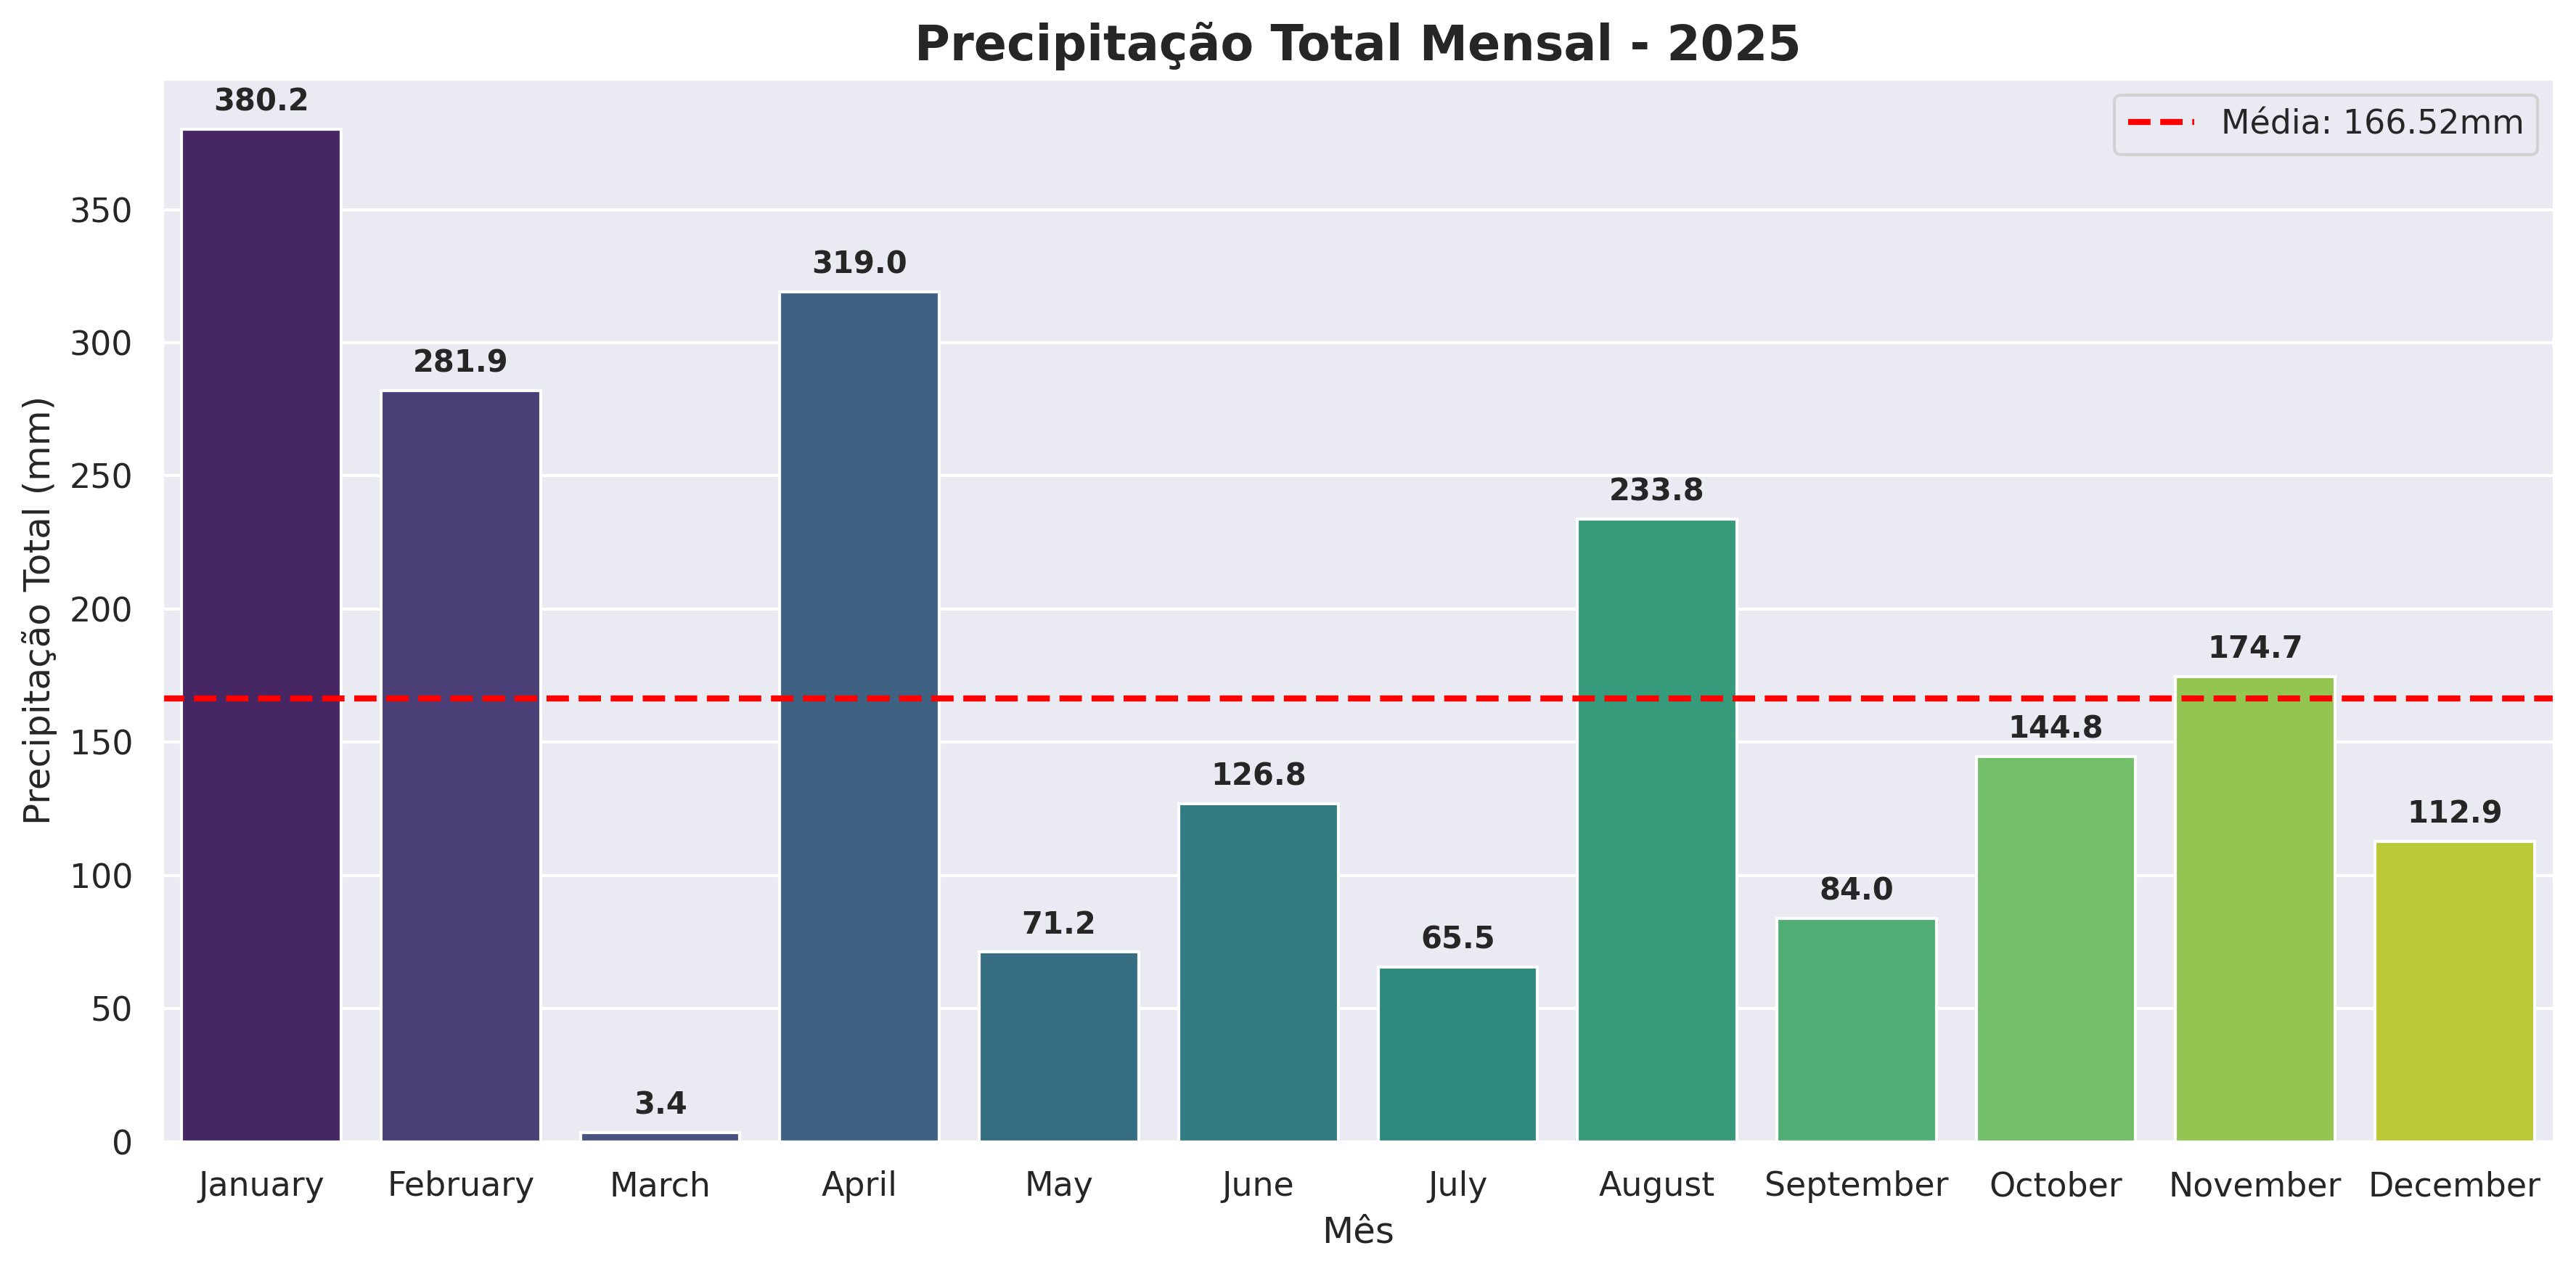

In [67]:
try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.utf-8')
except:
    pass

df_mensal = df.groupby(df['Data'].dt.month).agg({'Valor': 'sum'}).reset_index()
df_mensal['Mes_Nome'] = df_mensal['Data'].apply(lambda x: calendar.month_name[x].capitalize())

media_mensal = df_mensal['Valor'].mean()

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

sns.barplot(data=df_mensal, x='Mes_Nome', y='Valor', palette='viridis', ax=ax)

ax.axhline(media_mensal, color='red', linestyle='--', linewidth=2, label=f'Média: {media_mensal:.2f}mm')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10, fontweight='bold')

plt.title('Precipitação Total Mensal - 2025', fontsize=16, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Precipitação Total (mm)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

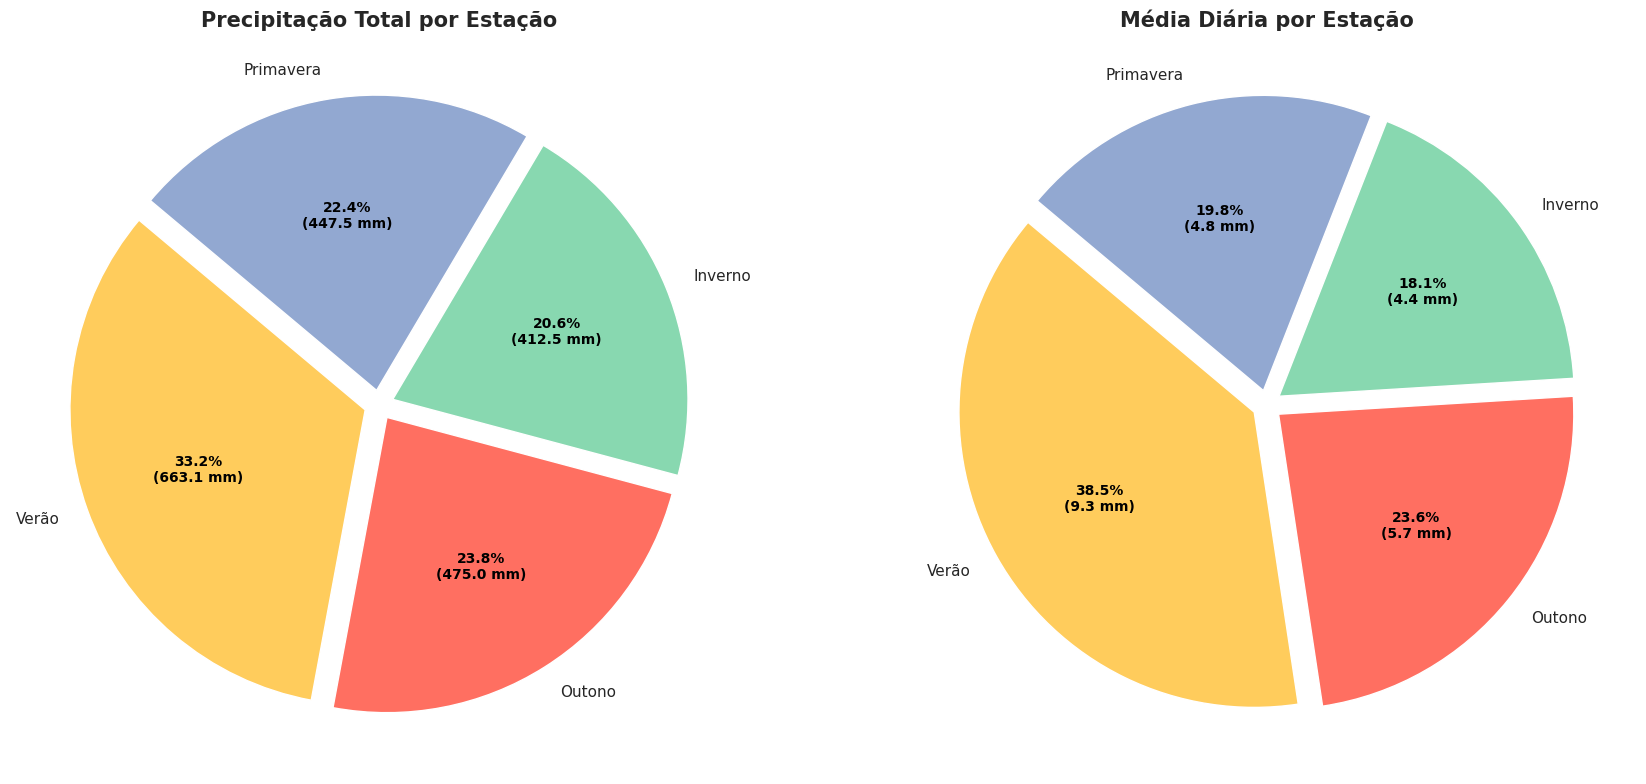

In [68]:
seasons = {
    'Verão': ('2025-01-01', '2025-03-20'),
    'Outono': ('2025-03-21', '2025-06-20'),
    'Inverno': ('2025-06-21', '2025-09-22'),
    'Primavera': ('2025-09-23', '2025-12-31')
}

labels, somas, medias = [], [], []

for nome, (inicio, fim) in seasons.items():
    filtro = df[(df['Data'] >= inicio) & (df['Data'] <= fim)]
    labels.append(nome)
    somas.append(filtro['Valor'].sum())
    medias.append(filtro['Valor'].mean() if not filtro.empty else 0)

def func_format(pct, allvals):
    absolute = pct/100.*sum(allvals)
    return f"{pct:.1f}%\n({absolute:.1f} mm)"


cores = ['#ffcc5c', '#ff6f61', '#88d8b0', '#92a8d1']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))


wedges1, texts1, autotexts1 = ax1.pie(
    somas, labels=labels,
    autopct=lambda pct: func_format(pct, somas),
    startangle=140, colors=cores, explode=(0.05, 0.05, 0.05, 0.05)
)
ax1.set_title('Precipitação Total por Estação', fontsize=15, fontweight='bold')


wedges2, texts2, autotexts2 = ax2.pie(
    medias, labels=labels,
    autopct=lambda pct: func_format(pct, medias),
    startangle=140, colors=cores, explode=(0.05, 0.05, 0.05, 0.05)
)
ax2.set_title('Média Diária por Estação', fontsize=15, fontweight='bold')

plt.setp(autotexts1, size=10, weight="bold", color="black")
plt.setp(autotexts2, size=10, weight="bold", color="black")

plt.tight_layout()
plt.show()